<a href="https://colab.research.google.com/github/msrahulvarma/RahulVarma_INFO5731_Fall2023/blob/main/Muppalla_RahulVarma_Inclass_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In class Exercise 4

The purpose of this exercise is to practice topic modeling.
Please use the text corpus you collected in your last in-class-exercise for this exercise.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due tonight November 1st, 2023 at 11:59 PM.
**Late submissions cannot be considered.**

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.

You may refer the code here:
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [4]:
import requests, csv
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint

url = "https://www.imdb.com/title/tt11858890/reviews/?ref_=tt_ql_2"
data = requests.get(url)
soup = BeautifulSoup(data.content, 'html.parser')

imdb_reviews=[]
right_table=soup.find('div', {'class':"lister"})
for i in right_table.findAll('div', class_="lister-item mode-detail imdb-user-review collapsable"):
  imdb_reviews.append(i.find("div", class_="text show-more__control").text.strip())
pprint(imdb_reviews)

['This is a lesson to the movie industry on how to use a budget. 80 million '
 'dollars was used splendidly. The cinematography was amazing, (Not terribly '
 'surprising because Rogue One) acting was great, and the story was decent.It '
 "wasn't without problems though. The story moves at an increasing pace and at "
 "some points you lose track of what's happening. Suspension of disbelief will "
 'be needed in some moments.The theme of the story was to make AI to be more '
 'than just robots. I think they succeeded there, but at the expense of the '
 'humans. Most of the humans in the story ended up being one faced - except '
 'for Joshua.The dynamic between Joshua and Alfie was by far the best part of '
 'the movie. The acting was great between the two.It was a good movie. Not '
 "great by any means, but I'm all for supporting a movie that is trying "
 'something new.Overall, I think Gareth Edwards should be given some more '
 'projects. AND filmmakers everywhere should learn how a bu

In [5]:
df = pd.DataFrame({'reviews': imdb_reviews})

df.to_csv('reviews.csv')
df.head()

,reviews
0,This is a lesson to the movie industry on how ...
1,The Creator seemed to promise so much through ...
2,My wife and I caught The Creator (2023) in the...
3,"Sigh. As a self-proclaimed sci-fi junkie, I wa..."
4,"Before, I was curious if the movie would delve..."


In [6]:
import nltk;
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import nltk
nltk.download('stopwords')
import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
install_java()
!pip install pyLDAvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


openjdk version "11.0.20.1" 2023-08-24
OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 36.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conf

In [8]:
!pip install --upgrade gensim
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
import urllib.request as urllib2
from bs4 import BeautifulSoup
import spacy.cli
spacy.cli.download("en")

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

rev_data = df['reviews'].values.tolist()
rev_data_words = list(sent_to_words(rev_data))
rev_data_words = remove_stopwords(rev_data_words)
print(rev_data_words[:1])

[['lesson', 'movie', 'industry', 'budget', 'million', 'dollars', 'used', 'splendidly', 'cinematography', 'amazing', 'terribly', 'surprising', 'rogue', 'one', 'acting', 'great', 'story', 'decent', 'without', 'problems', 'though', 'story', 'moves', 'increasing', 'pace', 'points', 'lose', 'track', 'happening', 'suspension', 'disbelief', 'needed', 'moments', 'theme', 'story', 'make', 'ai', 'robots', 'think', 'succeeded', 'expense', 'humans', 'humans', 'story', 'ended', 'one', 'faced', 'except', 'joshua', 'dynamic', 'joshua', 'alfie', 'far', 'best', 'part', 'movie', 'acting', 'great', 'two', 'good', 'movie', 'great', 'means', 'supporting', 'movie', 'trying', 'something', 'new', 'overall', 'think', 'gareth', 'edwards', 'given', 'projects', 'filmmakers', 'everywhere', 'learn', 'budget', 'used']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
bigram = gensim.models.Phrases(rev_data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[rev_data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
data_words_nostops = remove_stopwords(rev_data_words)

data_words_bigrams = make_bigrams(data_words_nostops)


nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['lesson', 'movie', 'industry', 'budget', 'dollar', 'use', 'splendidly', 'cinematography', 'amazing', 'terribly', 'surprising', 'rogue', 'act', 'great', 'story', 'decent', 'problem', 'story', 'move', 'increase', 'pace', 'point', 'lose', 'track', 'happen', 'suspension', 'disbelief', 'need', 'moment', 'theme', 'story', 'make', 'robot', 'think', 'succeed', 'expense', 'human', 'human', 'story', 'end', 'face', 'far', 'good', 'part', 'movie', 'act', 'great', 'good', 'movie', 'great', 'mean', 'support', 'movie', 'try', 'new', 'overall', 'think', 'give', 'project', 'filmmaker', 'everywhere', 'learn', 'budget', 'use']]


In [12]:
review_id2word = corpora.Dictionary(data_lemmatized)
review_texts = data_lemmatized
review_corpus = [review_id2word.doc2bow(text) for text in review_texts]
print(review_corpus[:1])
[[(review_id2word[i], f) for i, f in c] for c in review_corpus[:1]]

[[(0, 2), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 3), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 4), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 4), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 2)]]


[[('act', 2),
  ('amazing', 1),
  ('budget', 2),
  ('cinematography', 1),
  ('decent', 1),
  ('disbelief', 1),
  ('dollar', 1),
  ('end', 1),
  ('everywhere', 1),
  ('expense', 1),
  ('face', 1),
  ('far', 1),
  ('filmmaker', 1),
  ('give', 1),
  ('good', 2),
  ('great', 3),
  ('happen', 1),
  ('human', 2),
  ('increase', 1),
  ('industry', 1),
  ('learn', 1),
  ('lesson', 1),
  ('lose', 1),
  ('make', 1),
  ('mean', 1),
  ('moment', 1),
  ('move', 1),
  ('movie', 4),
  ('need', 1),
  ('new', 1),
  ('overall', 1),
  ('pace', 1),
  ('part', 1),
  ('point', 1),
  ('problem', 1),
  ('project', 1),
  ('robot', 1),
  ('rogue', 1),
  ('splendidly', 1),
  ('story', 4),
  ('succeed', 1),
  ('support', 1),
  ('surprising', 1),
  ('suspension', 1),
  ('terribly', 1),
  ('theme', 1),
  ('think', 2),
  ('track', 1),
  ('try', 1),
  ('use', 2)]]

In [13]:
review_id2word[0]


'act'

In [14]:
from pprint import pprint
lda_model = gensim.models.ldamodel.LdaModel(corpus=review_corpus,
                                           id2word=review_id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[review_corpus]

[(0,
  '0.028*"film" + 0.017*"make" + 0.013*"plot" + 0.012*"story" + 0.012*"good" + '
  '0.011*"see" + 0.010*"ai" + 0.008*"creator" + 0.008*"wife" + 0.008*"last"'),
 (1,
  '0.022*"ai" + 0.016*"say" + 0.016*"new" + 0.016*"perhaps" + 0.011*"movie" + '
  '0.011*"story" + 0.011*"side" + 0.011*"man" + 0.011*"many" + 0.011*"even"'),
 (2,
  '0.001*"movie" + 0.001*"feel" + 0.001*"even" + 0.001*"see" + 0.001*"film" + '
  '0.001*"enjoy" + 0.001*"come" + 0.001*"make" + 0.001*"work" + 0.001*"watch"'),
 (3,
  '0.001*"cost" + 0.001*"story" + 0.001*"make" + 0.001*"character" + '
  '0.001*"love" + 0.001*"care" + 0.001*"director" + 0.001*"art" + '
  '0.001*"clunky" + 0.001*"work"'),
 (4,
  '0.001*"film" + 0.001*"feel" + 0.001*"end" + 0.001*"story" + 0.001*"movie" + '
  '0.001*"omega" + 0.001*"really" + 0.001*"new" + 0.001*"year" + '
  '0.001*"project"'),
 (5,
  '0.038*"film" + 0.024*"feel" + 0.018*"really" + 0.013*"story" + 0.011*"end" '
  '+ 0.011*"project" + 0.011*"creator" + 0.008*"war" + 0.008*"yea

In [15]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=review_id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3527585337371254


In [16]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=review_corpus,
                                           id2word=review_id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
start, limit, step=2, 20, 2
model_list, coherence_values = compute_coherence_values(dictionary=review_id2word, corpus=review_corpus, texts=data_lemmatized, start=start, limit=limit, step=step)
cohe_val = []
for m, cv in zip(range(start, limit, step), coherence_values):
    cohe_val.append(round(cv,4))
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.2788
Num Topics = 4  has Coherence Value of 0.2951
Num Topics = 6  has Coherence Value of 0.3461
Num Topics = 8  has Coherence Value of 0.3403
Num Topics = 10  has Coherence Value of 0.3458
Num Topics = 12  has Coherence Value of 0.3487
Num Topics = 14  has Coherence Value of 0.3331
Num Topics = 16  has Coherence Value of 0.3896
Num Topics = 18  has Coherence Value of 0.3713


In [17]:
sum(cohe_val)/len(cohe_val)


0.3387555555555556

In [19]:
optimal_model = model_list[3] # getting the topics=8 model, which is in 3rd index of our model and getting the 8 topics.
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.024*"film" + 0.011*"make" + 0.009*"creator" + 0.009*"ai" + 0.009*"last" + '
  '0.007*"see" + 0.007*"good" + 0.007*"wife" + 0.007*"star" + 0.007*"miss"'),
 (1,
  '0.001*"movie" + 0.001*"feel" + 0.001*"say" + 0.001*"story" + 0.001*"see" + '
  '0.001*"film" + 0.001*"war" + 0.001*"ai" + 0.001*"think" + 0.001*"well"'),
 (2,
  '0.036*"movie" + 0.012*"feel" + 0.012*"even" + 0.009*"enjoy" + 0.009*"see" + '
  '0.009*"come" + 0.006*"really" + 0.006*"character" + 0.006*"work" + '
  '0.006*"many"'),
 (3,
  '0.019*"story" + 0.013*"movie" + 0.011*"cost" + 0.008*"great" + 0.008*"make" '
  '+ 0.008*"act" + 0.008*"use" + 0.006*"human" + 0.006*"end" + '
  '0.006*"creator"'),
 (4,
  '0.016*"ai" + 0.012*"new" + 0.012*"perhaps" + 0.012*"say" + 0.008*"story" + '
  '0.008*"movie" + 0.008*"look" + 0.008*"deliver" + 0.008*"humanity" + '
  '0.008*"even"'),
 (5,
  '0.028*"film" + 0.016*"feel" + 0.013*"war" + 0.011*"see" + 0.009*"really" + '
  '0.008*"creator" + 0.008*"end" + 0.007*"story" + 0.007*"movi

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.

You may refer the code here:
https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [20]:
from gensim.models import LsiModel

lsamodel = LsiModel(review_corpus, num_topics=10, id2word = review_id2word)
print(lsamodel.print_topics(num_topics=10, num_words=10))


[(0, '0.513*"movie" + 0.306*"film" + 0.266*"feel" + 0.192*"well" + 0.146*"good" + 0.145*"think" + 0.138*"story" + 0.117*"go" + 0.116*"see" + 0.111*"end"'), (1, '0.436*"film" + -0.341*"movie" + 0.184*"really" + -0.152*"think" + 0.139*"creator" + 0.132*"war" + 0.123*"make" + 0.118*"project" + 0.100*"see" + 0.099*"man"'), (2, '-0.200*"see" + -0.167*"little" + -0.165*"war" + -0.149*"ai" + -0.145*"review" + 0.139*"project" + -0.127*"bit" + -0.113*"make" + -0.111*"anti" + 0.109*"come"'), (3, '-0.295*"film" + 0.208*"movie" + -0.204*"good" + 0.201*"feel" + 0.169*"even" + -0.139*"make" + -0.134*"big" + -0.113*"miss" + -0.111*"trailer" + -0.111*"together"'), (4, '0.226*"story" + -0.206*"film" + 0.198*"many" + 0.176*"movie" + -0.153*"feel" + 0.152*"enjoy" + 0.151*"look" + 0.145*"work" + 0.139*"even" + -0.132*"war"'), (5, '0.258*"ai" + -0.196*"movie" + 0.189*"perhaps" + 0.186*"say" + 0.182*"side" + -0.154*"enjoy" + 0.134*"new" + 0.127*"man" + 0.127*"humanity" + 0.124*"deliver"'), (6, '0.188*"story

In [21]:
def compute_lsa_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lsamodel = LsiModel(corpus, num_topics=num_topics, id2word = dictionary)
        model_list.append(lsamodel)
        coherencemodel = CoherenceModel(model=lsamodel, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

start, limit, step=2, 20, 2
model_lsa, coherence_values = compute_lsa_coherence_values(dictionary=review_id2word, corpus=review_corpus, texts=data_lemmatized, start=start, limit=limit, step=step)
coherence_values_all = []
for m, cv in zip(range(start, limit, step), coherence_values):
    coherence_values_all.append(round(cv,4))
    print("Topic no =", m, " it's Coherence Value is", round(cv, 4))

Topic no = 2  it's Coherence Value is 0.2397
Topic no = 4  it's Coherence Value is 0.3461
Topic no = 6  it's Coherence Value is 0.5014
Topic no = 8  it's Coherence Value is 0.3974
Topic no = 10  it's Coherence Value is 0.4392
Topic no = 12  it's Coherence Value is 0.399
Topic no = 14  it's Coherence Value is 0.4215
Topic no = 16  it's Coherence Value is 0.4402
Topic no = 18  it's Coherence Value is 0.4597


In [22]:
coherencemodel = CoherenceModel(model=lsamodel, texts=data_lemmatized, dictionary=review_id2word, coherence='c_v')
print(coherencemodel.get_coherence())

0.426555161626679


In [23]:
coherence_values_all


[0.2397, 0.3461, 0.5014, 0.3974, 0.4392, 0.399, 0.4215, 0.4402, 0.4597]

In [24]:
#sum(coherence_values_all)/len(coherence_values_all)

average_coherence = sum(coherence_values_all) / len(coherence_values_all)
print("Average Coherence Value:", average_coherence)


Average Coherence Value: 0.40491111111111106


## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.

You may refer the code here:
https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [25]:
nltk.download('all')
!pip install preprocess
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pyLDAvis
pyLDAvis.enable_notebook()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [26]:
top_valu = 10
top_topwords = {}
for j, topic_to_word in enumerate(df.reviews.tolist()):
    top = np.argsort(topic_to_word)[::-1][:top_valu]
    msg = 'Topic %i '  % j
    top_words = [df.reviews.tolist()[i].strip()[:35] for i in top]
    msg += 'has stop words '.join(top_words)
    print (msg)
    top_topwords[j] = top_words

Topic 0 This is a lesson to the movie indus
Topic 1 This is a lesson to the movie indus
Topic 2 This is a lesson to the movie indus
Topic 3 This is a lesson to the movie indus
Topic 4 This is a lesson to the movie indus
Topic 5 This is a lesson to the movie indus
Topic 6 This is a lesson to the movie indus
Topic 7 This is a lesson to the movie indus
Topic 8 This is a lesson to the movie indus
Topic 9 This is a lesson to the movie indus
Topic 10 This is a lesson to the movie indus
Topic 11 This is a lesson to the movie indus
Topic 12 This is a lesson to the movie indus
Topic 13 This is a lesson to the movie indus
Topic 14 This is a lesson to the movie indus
Topic 15 This is a lesson to the movie indus
Topic 16 This is a lesson to the movie indus
Topic 17 This is a lesson to the movie indus


<BarContainer object of 20 artists>

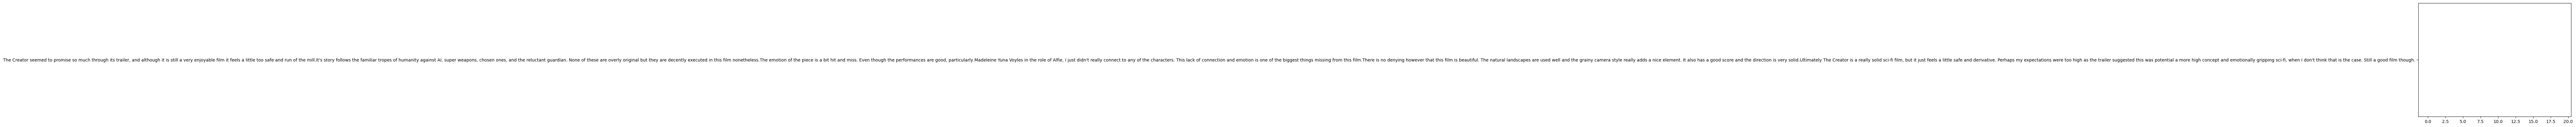

In [27]:
plt.bar(np.arange(20), df.reviews.tolist()[1])


## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.

You may refer the code here:
https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [28]:
# Write your code here
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 50.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 101.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 76.7 MB/s eta 0:00:00
  Preparing metadat

In [29]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df.reviews.tolist())
freq = topic_model.get_topic_info();
freq.head(5)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2023-11-04 18:01:26,999 - BERTopic - Transformed documents to Embeddings
2023-11-04 18:01:38,506 - BERTopic - Reduced dimensionality
2023-11-04 18:01:38,525 - BERTopic - Clustered reduced embeddings


,Topic,Count,Name,Representation,Representative_Docs
0,-1,18,-1_the_and_of_to,"[the, and, of, to, it, that, in, was, is, its]",[The reviews of this movie are more misleading...


In [30]:
topic_model.get_topic(-1)


[('the', 0.17485465027931563),
 ('and', 0.10286578426276938),
 ('of', 0.08593238708325103),
 ('to', 0.08363608920223353),
 ('it', 0.07170208425352034),
 ('that', 0.06477318192881774),
 ('in', 0.061524844277409826),
 ('was', 0.059543567387370155),
 ('is', 0.05753676660349394),
 ('its', 0.05550324917206524)]

In [31]:
topic_model.visualize_term_rank()


In [32]:
topic_model.update_topics(df.reviews.tolist(), n_gram_range=(1, 2))
topic_model.visualize_term_rank()

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.



Matrix decomposition is a modeling technique used in Latent Semantic Analysis (LSA) to capture subjects. Dimension reduction is used to specify these subjects according to how they load onto words. On the other hand, its loadings' negative values might occasionally make interpretation more difficult. The corpus and the dictionary are the main inputs used in LSA. Latent Dirichlet Allocation (LDA), on the other hand, makes connections between terms inside a text and terms from other sources. Its skill with complicated language is one of its best qualities. It's interesting to see that the product reviews at the top and bottom of the list tend to be fairly similar. The power of LDA resides in its capacity to extract relevant themes from the original matrix document while retaining other information. Because of this feature, LDA frequently outperforms coupled efforts of BERT and LDA.